In [24]:
import os

import pandas as pd
import numpy as np

import matplotlib.pylab as plt
from PIL import Image, ImageDraw

%matplotlib inline

In [25]:
path_to_csv = "/kaggle/input/histopathologic-cancer-detection/train_labels.csv"
path_to_train = "/kaggle/input/histopathologic-cancer-detection/train/"
path_to_test = "/kaggle/input/histopathologic-cancer-detection/test/"

In [26]:
labels_df = pd.read_csv(path_to_csv)
labels_df.head() # this will show the id of the image and labels

,id,label
0,f38a6374c348f90b587e046aac6079959adf3835,0
1,c18f2d887b7ae4f6742ee445113fa1aef383ed77,1
2,755db6279dae599ebb4d39a9123cce439965282d,0
3,bc3f0c64fb968ff4a8bd33af6971ecae77c75e08,0
4,068aba587a4950175d04c680d38943fd488d6a9d,0


In [27]:
labels_df.describe()

,label
count,220025.000000
mean,0.405031
std,0.490899
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [28]:
labels_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220025 entries, 0 to 220024
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   id      220025 non-null  object
 1   label   220025 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 3.4+ MB


In [29]:
# let's check for each labels
labels_df.label.value_counts()

0    130908
1     89117
Name: label, dtype: int64

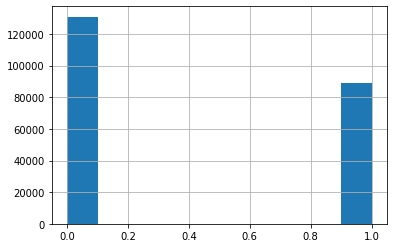

In [30]:
labels_df['label'].hist();

In [31]:
# malignant ids

malignant_ids = labels_df.loc[labels_df.label == 1]['id'].values
print(len(malignant_ids))
print(malignant_ids)

89117
['c18f2d887b7ae4f6742ee445113fa1aef383ed77'
 'a24ce148f6ffa7ef8eefb4efb12ebffe8dd700da'
 '7f6ccae485af121e0b6ee733022e226ee6b0c65f' ...
 '309210db7f424edbc22b2d13bf2fa27518b18f5c'
 'd4b854fe38b07fe2831ad73892b3cec877689576'
 'a81f84895ddcd522302ddf34be02eb1b3e5af1cb']


In [32]:
color = True # show image in grayscale, if you want color image then change it to True

In [33]:
# setting figure sizes
plt.rcParams['figure.figsize'] = (10.0, 10.0)
plt.subplots_adjust(wspace=0, hspace=0)
nrows,ncols=3,3

<Figure size 720x720 with 0 Axes>

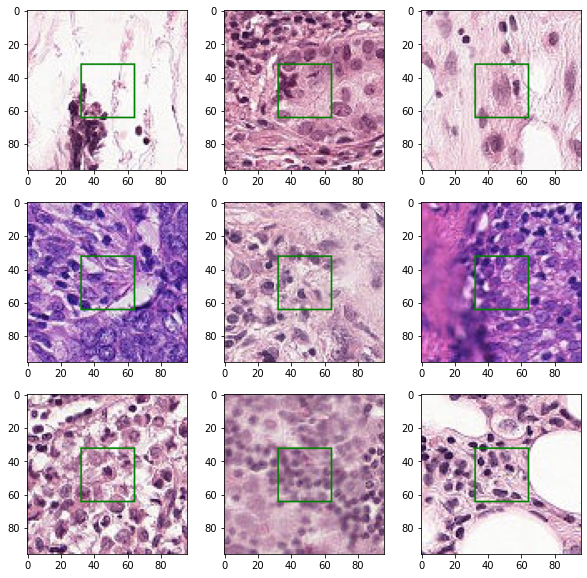

In [34]:
# display images
for i,id_ in enumerate(malignant_ids[:nrows*ncols]):
    full_filenames = os.path.join(path_to_train , id_ +'.tif')
    # load image
    img = Image.open(full_filenames)
    # draw a 32*32 rectangle
    draw = ImageDraw.Draw(img)
    draw.rectangle(((32, 32), (64, 64)),outline="green")
    plt.subplot(nrows, ncols, i+1)
    if color is True:
        plt.imshow(np.array(img))
    else:
        plt.imshow(np.array(img)[:,:,0],cmap="gray")
        plt.axis('off')

In [35]:
print("image shape:", np.array(img).shape)
print("pixel values range from %s to %s" %(np.min(img), np.max(img)))

image shape: (96, 96, 3)
pixel values range from 0 to 255
